<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/bakery_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

## Sprzedaż w piekarni The Bread Basket



W tym zeszycie zajmiemy się wizualizacją danych dotyczących sprzedaży w latach 2016-2017 w piekarni *The Bread Basket* w Edynburgu.

Dane pochodzą ze zbioru udostępnionego [na stronie kaggle](https://www.kaggle.com/akashdeepkuila/bakery) w ramach licencji *CC0*.

Zapoznajmy się z materiałem dostępnym w notebooku i na podstawie instrukcji przygotujmy dane, które będą potrzebne podczas zajęć.

**Uwaga.** Wracając do dokumentu, pamiętaj o ponownym wywołaniu komórek z kodem.

### Zawartość zbioru danych

W zaimportowanym niżej pliku **bakery_sales.csv** znajduje się 20 507 pozycji przypisanych do 9 684 transakcji klientów z informacjami o:


*   **TransactionNo** - numerze transakcji
*   **Items** - zakupionym produkcie
*   **DateTime** - czasie transakcji
*   **Daypart** - porze dnia (rano, po południu, wieczorem, w nocy)
*   **DayType** - typ dnia (dzień roboczy vs weekend).

Potrzebne nam dane zostały udostępnione wraz z dokumentem - poniższy kod importuje potrzebne pliki.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Dane importujemy do ramki danych pandas, dzięki czemu będziemy mogli sprawnie pracować nad ich wizualizacją.

In [3]:
bakery_data = pd.read_csv('/content/drive/My Drive/Vis/Bakery Data/bakery_sales.csv')
bakery_data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,30/10/2016 9:58,Morning,Weekend
1,2,Scandinavian,30/10/2016 10:05,Morning,Weekend
2,2,Scandinavian,30/10/2016 10:05,Morning,Weekend
3,3,Hot chocolate,30/10/2016 10:07,Morning,Weekend
4,3,Jam,30/10/2016 10:07,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,04/09/2017 14:32,Afternoon,Weekend
20503,9682,Tea,04/09/2017 14:32,Afternoon,Weekend
20504,9683,Coffee,04/09/2017 14:57,Afternoon,Weekend
20505,9683,Pastry,04/09/2017 14:57,Afternoon,Weekend


## Przygotowanie zeszytu

Na początku chcemy upewnić się, że dane zostały poprawnie rozpoznane i dokonać potrzebnych konwersji.

Na podstawie poglądu danych powyżej spodziewamy się, że pierwsza kolumna zawiera informację w postaci kolejnych liczb całkowitych, w kolumnie drugiej znajdziemy nazwy różnych sprzedawanych produktów, kolumna trzecia powinna zawierać dane rozpoznane jako data z czasem, zaś ostatnie dwie kolumny powinny zawierać informacje w postaci tekstowej.

### Sprawdzenie typów danych

Poniżej potrzebujemy wykonać dołączone instrukcje, aby otrzymać ramki danych wykorzystywane na zajęciach.

Na początek sprawdźmy jak zostały rozpoznane dane podczas importu.

In [4]:
bakery_data.dtypes

TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

Upewnijmy się, czy w danych znajdują się rekordy, dla których brakuje informacji w którejkolwiek z kolumn.

In [5]:
"complete records: " + str(len(bakery_data.dropna(how="any"))) + "; total records: " + str(len(bakery_data))

'complete records: 20507; total records: 20507'

Przyjrzymy się jeszcze temu, jakie dane faktycznie ukrywają się pod typem **object** w przypadku każdej z kolumn.

In [6]:
for column in bakery_data.columns:
  check_types = bakery_data[column].apply(lambda x: type(x))
  print(check_types.value_counts())

TransactionNo
<class 'int'>    20507
Name: count, dtype: int64
Items
<class 'str'>    20507
Name: count, dtype: int64
DateTime
<class 'str'>    20507
Name: count, dtype: int64
Daypart
<class 'str'>    20507
Name: count, dtype: int64
DayType
<class 'str'>    20507
Name: count, dtype: int64


#### Konwersja daty

W przypadku czasu transakcji domyślnie jest ona identyfikowana jako *string*.

Zamieńmy dane w kolumnie **DateTime** na  *timestamp*.

In [7]:
bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])

<ipython-input-7-f9936c4c7655>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])


Dodajmy nową kolumnę z datą transakcji o nazwie **Date** i sprawdźmy poprawność konwersji.

In [8]:
bakery_data["Date"] = bakery_data["DateTime"].dt.date

In [9]:
bakery_data["Date"].value_counts()

Date
2017-04-02    292
2016-05-11    275
2017-04-03    257
2017-03-25    246
2017-01-28    237
             ... 
2017-09-04     69
2017-01-16     66
2016-08-12     66
2016-12-27     47
2017-01-01      1
Name: count, Length: 159, dtype: int64

Ponieważ nie będziemy wykorzystywać informacji o czasie, pozostawmy w **bakery_data** jedynie kolumnę z datą.

In [10]:
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Daypart", "DayType"]]
bakery_data

,TransactionNo,Items,Date,Daypart,DayType
0,1,Bread,2016-10-30,Morning,Weekend
1,2,Scandinavian,2016-10-30,Morning,Weekend
2,2,Scandinavian,2016-10-30,Morning,Weekend
3,3,Hot chocolate,2016-10-30,Morning,Weekend
4,3,Jam,2016-10-30,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend
20503,9682,Tea,2017-09-04,Afternoon,Weekend
20504,9683,Coffee,2017-09-04,Afternoon,Weekend
20505,9683,Pastry,2017-09-04,Afternoon,Weekend


#### Przypisanie kategorii bazując na liczbie sprzedanych produktów

Przyjrzymy się bliżej zawartości kolumny **Items**.

In [11]:
bakery_data["Items"].value_counts()

Items
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

Widzimy, że w badanym okresie sprzedano wiele produktów z różną częstotliwością.

Wprowadzimy kategoryzację, dodając kolumnę **Item Categories**, która pozwoli nam wyróżnić 5 najpopularniejszych produktów, zaś pozostałym przypisać kategorię *Other*.

In [12]:
product_categories = list(bakery_data["Items"].value_counts().index)[0:5]
product_categories.append("Other")
product_categories
bakery_data["Item Categories"] = pd.Series(pd.Categorical(bakery_data["Items"], categories=product_categories)).fillna("Other")
bakery_data

,TransactionNo,Items,Date,Daypart,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


#### Konwersja pory dnia do kategorii

Przyjrzymy się bliżej zawartości kolumny **Daypart**.

In [13]:
bakery_data["Daypart"].value_counts()

Daypart
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: count, dtype: int64

W przypadku tej kolumny lista kategorii jest krótka - zależy nam jedynie, by na wizualizacji kolejność pór dnia odzwierciedlała ich kolejność występowania.

Zdefiniujemy nową kolumnę **Day Part** i ustalimy właściwą kolejność kategorii i zastąpimy nią dotychczasową kolumnę **Daypart**.

In [14]:
bakery_data["Day Part"] = pd.Series(pd.Categorical(bakery_data["Daypart"], categories=["Morning", "Afternoon", "Evening", "Night"]))
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Day Part", "DayType", "Item Categories"]]
bakery_data

,TransactionNo,Items,Date,Day Part,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


#### Konwersja typu dnia do kategorii

Przyjrzyjmy się bliżej zawartości kolumny **Day Type**.

In [15]:
bakery_data["DayType"].value_counts()

DayType
Weekday    12807
Weekend     7700
Name: count, dtype: int64

Podobnie jak w przypadku pory dnia, lista kategorii jest krótka - przygotujemy nową kolumnę **Day Type** w analogiczny sposób i usuniemy niepotrzebną kolumnę z zestawienia.

In [16]:
bakery_data["Day Type"] = pd.Series(pd.Categorical(bakery_data["DayType"], categories=["Weekday", "Weekend"]))
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Day Part","Day Type", "Item Categories"]]
bakery_data

,TransactionNo,Items,Date,Day Part,Day Type,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


### Stworzenie ramek danych wykorzystywanych w wizualizacji

Poza samym zbiorem **bakery_data** na zajęciach będziemy potrzebowali jeszcze kilku perspektyw dla celów wizualizacji.

#### Statystyki dzienne

Poniżej liczymy ile produktów i w ramach ilu transacji kupowano dziennie z podziałem na typ dnia.

In [17]:
items_daily = bakery_data[["Date","Day Type", "Items"]].groupby(["Date", "Day Type"]).count()
transactions_daily = bakery_data[["Date","Day Type", "TransactionNo"]].groupby(["Date", "Day Type"]).nunique()
daytype_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Type"])
daytype_statistics_daily

Items  TransactionNo
Date       Day Type                      
2016-01-11 Weekday     150             77
           Weekend       0              0
2016-01-12 Weekday      83             47
           Weekend       0              0
2016-02-11 Weekday     164             83
...                    ...            ...
2017-12-01 Weekend       0              0
2017-12-02 Weekday       0              0
           Weekend     113             48
2017-12-03 Weekday       0              0
           Weekend     146             62

[318 rows x 2 columns]

Poniżej liczymy ile produktów i w ramach ilu transacji kupowano dziennie z podziałem na porę dnia.

In [18]:
items_daily = bakery_data[["Date","Day Part", "Items"]].groupby(["Date", "Day Part"]).count()
transactions_daily = bakery_data[["Date","Day Part", "TransactionNo"]].groupby(["Date", "Day Part"]).nunique()
daypart_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Part"])
daypart_statistics_daily

Items  TransactionNo
Date       Day Part                       
2016-01-11 Morning       56             29
           Afternoon     92             46
           Evening        2              2
           Night          0              0
2016-01-12 Morning       31             17
...                     ...            ...
2017-12-02 Night          0              0
2017-12-03 Morning       32             15
           Afternoon    114             47
           Evening        0              0
           Night          0              0

[636 rows x 2 columns]

#### Statystyki kategorii

Na koniec zwracamy jeszcze liczbę produktów zakupionych w ramach transakcji z informacją o porze i typie dnia.

In [19]:
items_count = bakery_data[["TransactionNo", "Items"]].groupby(["TransactionNo"]).count()
transactions_data = pd.merge(pd.DataFrame(bakery_data[["TransactionNo", "Day Type", "Day Part"]].drop_duplicates()), items_count, on="TransactionNo")
transactions_data

,TransactionNo,Day Type,Day Part,Items
0,1,Weekend,Morning,1
1,2,Weekend,Morning,2
2,3,Weekend,Morning,3
3,4,Weekend,Morning,1
4,5,Weekend,Morning,3
...,...,...,...,...
9460,9680,Weekend,Afternoon,1
9461,9681,Weekend,Afternoon,4
9462,9682,Weekend,Afternoon,4
9463,9683,Weekend,Afternoon,2


## Zadania

<ipython-input-20-1870ef1acef2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_data_1["Item Categories"] = pd.Series(pd.Categorical(bakery_data_1["Items"], categories=product_categories_1)).fillna("Other")


([<matplotlib.patches.Wedge at 0x7aa0d3b6b5b0>,
 [Text(0.7357346791682313, 0.8177374162096411, 'Coffee'),
  Text(-0.6345220004389421, 0.8985442843616354, 'Bread'),
  Text(-1.0718473025229034, 0.24727183437337844, 'Tea'),
  Text(-1.0876264330580458, -0.16452580987016172, 'Cake'),
  Text(0.16827382004768213, -1.0870528604840524, 'Other')],
 [Text(0.4013098250008534, 0.4460385906598042, '27'),
  Text(-0.346102909330332, 0.4901150641972556, '16'),
  Text(-0.5846439831943109, 0.13487554602184276, '7'),
  Text(-0.5932507816680249, -0.08974135083827002, '5'),
  Text(0.09178572002600843, -0.5929379239003921, '45')])

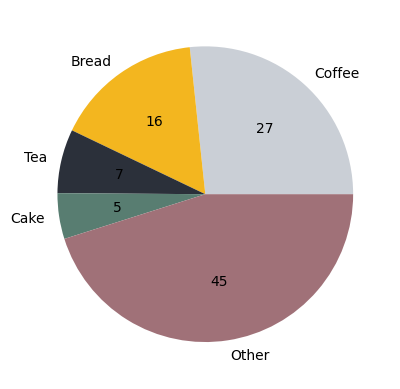

In [20]:
bakery_data_1 = bakery_data
product_categories_1 = list(bakery_data_1["Items"].value_counts().index)[0:4]
product_categories_1.append("Other")
bakery_data_1["Item Categories"] = pd.Series(pd.Categorical(bakery_data_1["Items"], categories=product_categories_1)).fillna("Other")
my_colormap = ["#cacfd6", "#f3b61f", "#2b303a", "#587d71", "#a07178"]
items_count_1 = bakery_data_1[["Item Categories","Items"]].groupby(["Item Categories"], as_index=False).count()
plt.pie(items_count_1["Items"],labels=items_count_1["Item Categories"],colors=my_colormap,autopct="%.f")

<BarContainer object of 5 artists>

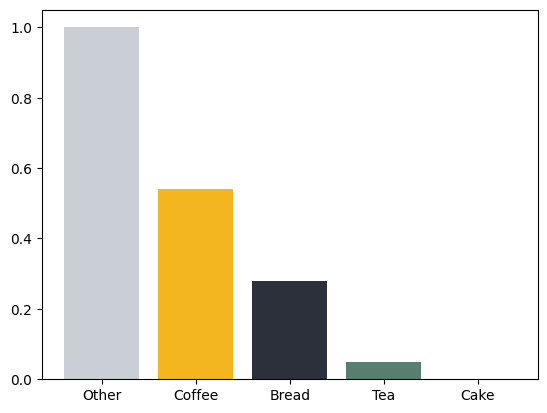

In [21]:
items_count_1["Normalized"]=(items_count_1["Items"]-items_count_1["Items"].min()) / (items_count_1["Items"].max()-items_count_1["Items"].min())
items_count_1 = items_count_1.sort_values(by=["Normalized"], ascending=False)
my_colormap = ["#cacfd6", "#f3b61f", "#2b303a", "#587d71", "#a07178"]
(ListedColormap(my_colormap))
plt.bar(items_count_1["Item Categories"],label=items_count_1["Normalized"],color=my_colormap,height = items_count_1["Normalized"])

In [22]:
import seaborn as sns

sns.set_theme()
sns.set_style("dark")
sns.set_context("talk")

palette = sns.color_palette(palette="husl",
	  n_colors=5,
	  desat=0.2,
	  as_cmap=False
	  )

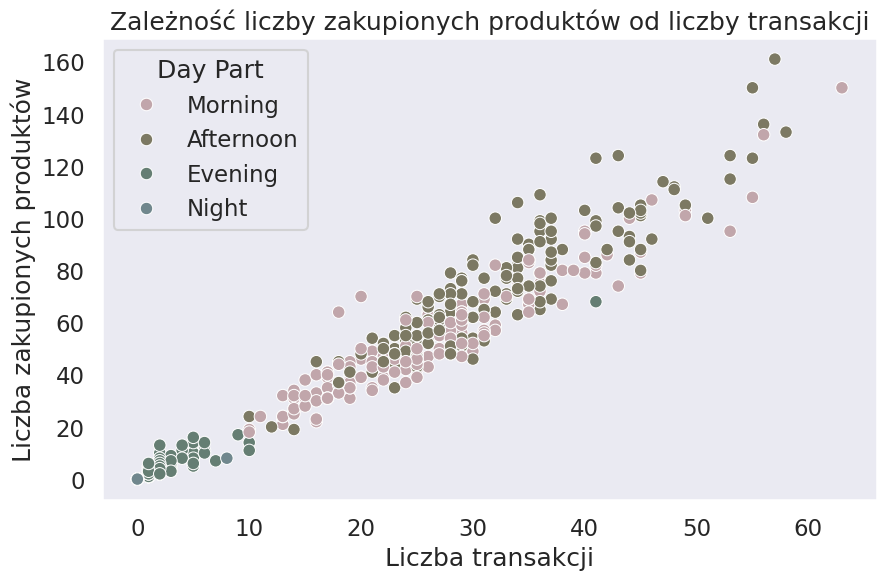

In [23]:
sns.set_palette(palette)
# Tworzymy wykres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daypart_statistics_daily, x='TransactionNo', y='Items', hue='Day Part')

# Dodajemy tytuł i etykiety osi
plt.title('Zależność liczby zakupionych produktów od liczby transakcji')
plt.xlabel('Liczba transakcji')
plt.ylabel('Liczba zakupionych produktów')

# Wyświetlamy wykres
plt.show()

<Axes: xlabel='TransactionNo', ylabel='Items'>

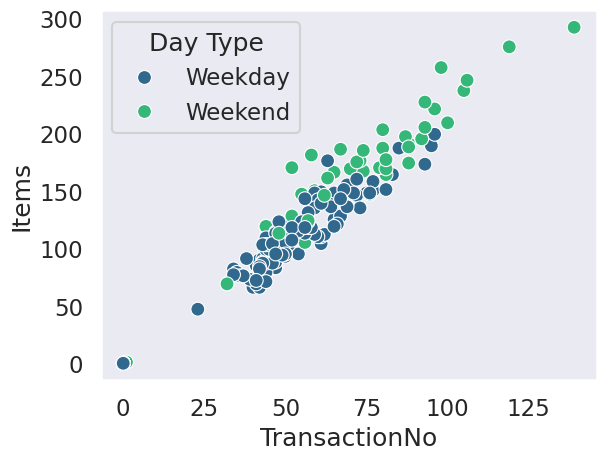

In [24]:
# Korzystając z ramki danych daytype_statistics_daily stwórz wykres pokazujący zależność liczby zakupionych produktów od liczby transakcji.
# Wykorzystaj kolor, aby odróżnić transakcje z weekendu od tych, które miały miejsce w dni robocze.

sns.scatterplot(data=daytype_statistics_daily, x='TransactionNo', y='Items', hue='Day Type', palette='viridis', s=100)

<Axes: xlabel='TransactionNo', ylabel='Items'>

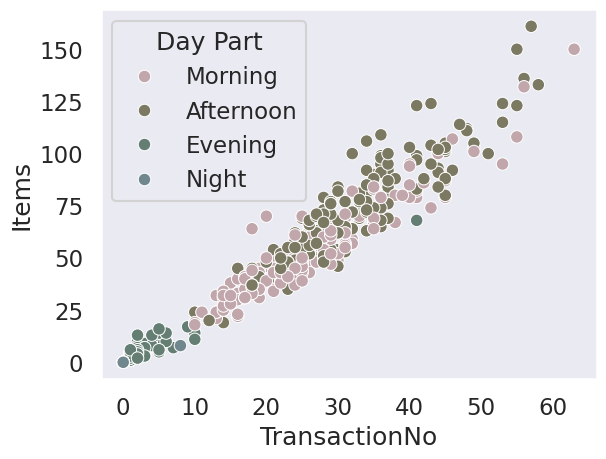

In [26]:
#Korzystając z ramki danych daypart_statistics_daily stwórz wykres pokazujący zależność liczby zakupionych produktów od liczby transakcji.
#Wykorzystaj kolor, aby zilustrować punkty odpowiadające różnym porom dnia.
sns.scatterplot(data=daypart_statistics_daily, x='TransactionNo', y='Items', hue='Day Part')

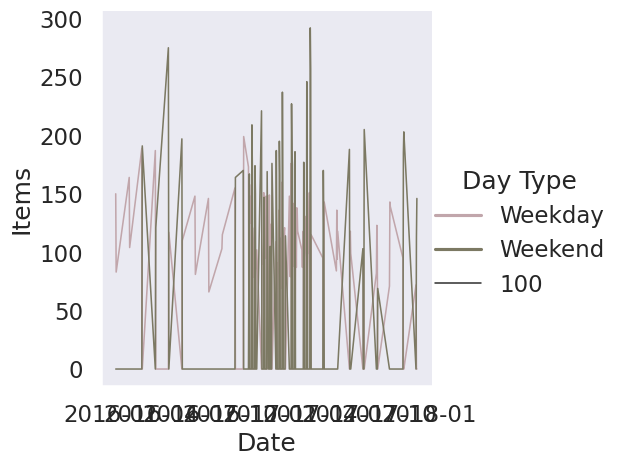

In [37]:
# Stwórz wykres liniowy, który zobrazuje, ile produktów było kupowane w
# całym okresie w zależności od typu dnia.

sns.relplot(data=daytype_statistics_daily,
  x= "Date",
  y= "Items",
  hue = "Day Type",
  kind="line",
  dashes=False,
  markers=True,
  size=100
  );